In [11]:
import sys
import os
sys.path.append(os.path.abspath('..')) 
from src.load_data import load_dataset
from src.preprocess import Preprocess
from src.svm_rff import SVM_RFF

In [12]:
data_path = os.path.join("..", "data", "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_balanced = load_dataset(data_path)
pre = Preprocess(target_col="Diabetes_binary", numeric_cols=["BMI", "MentHlth", "PhysHlth"], invert_col_scale=["GenHlth"])
X_train, X_test, y_train, y_test = pre.fit_transform(diabetes_balanced)

Training: 100%|██████████| 1000/1000 [04:54<00:00,  3.40it/s]

Accuracy: 0.7317
Precision: 0.6966
Recall: 0.8211


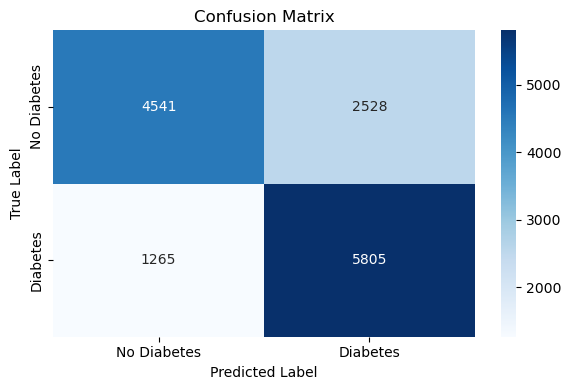

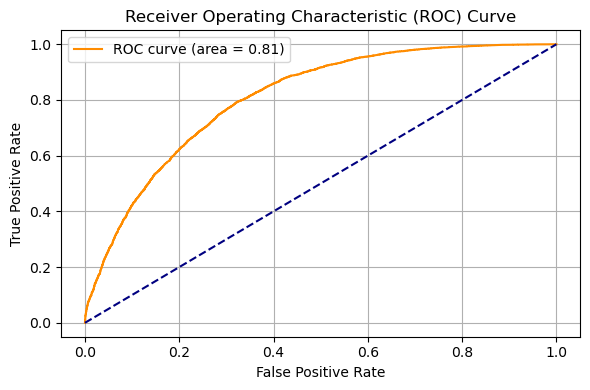

In [13]:
svm = SVM_RFF(X_train, X_test, y_train, y_test, learning_rate=0.001, _lambda=0.001, epochs=1000, epsilon=1e-4, gamma=0.01, D=500)
svm.fit()
svm.plot_roc_curve()